In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

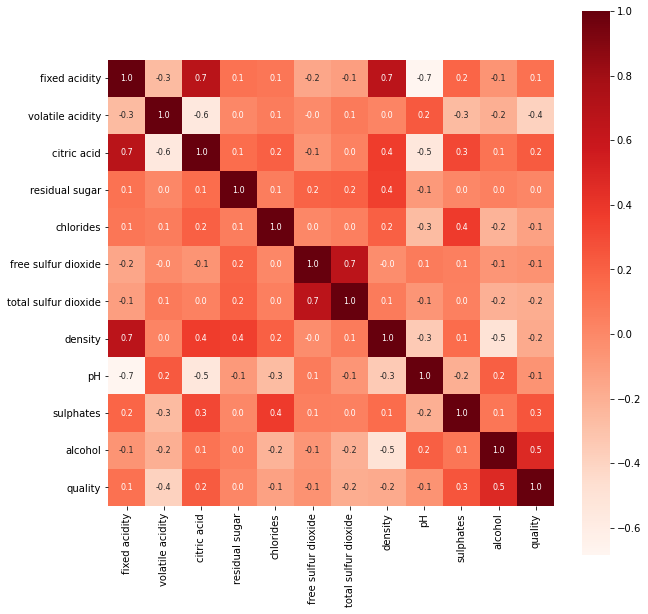

In [8]:
# constructing a heatmap to understand the correlation between the columns
correlation = wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

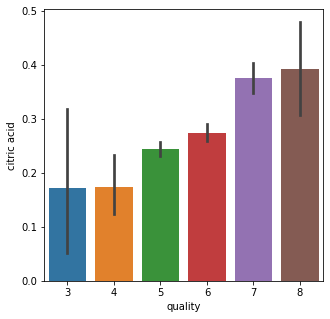

In [9]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

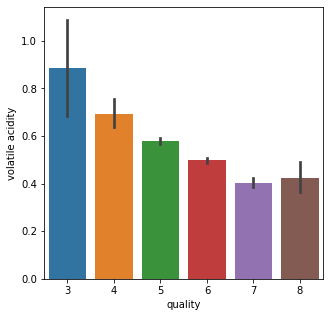

In [10]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

In [26]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>6 else 0)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)
print(X.shape, X_train.shape, X_test.shape)

(1599,) (1199,) (400,)
(1599, 11) (1199, 11) (400, 11)


## Model Training

In [31]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction, Y_test),2)*100
print('Accuracy : ', test_data_accuracy) 

Accuracy :  90.0


In [33]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
